In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\DOANTR~1\AppData\Local\Temp/ipykernel_23280/330176492.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Running experiments to understand gradient descent

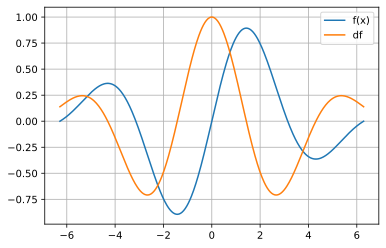

In [3]:
# The function
x = np.linspace(start=-2 * np.pi, stop=2 * np.pi, num=401)
f_x = np.sin(x) * np.exp(-x ** 2 * 0.05)

# And its derivative
d_f = np.cos(x) * np.exp(-x ** 2 * 0.05) + np.sin(x) * (-0.1 * x) * np.exp(-x ** 2 * 0.05)

# Quick plot for inspection
plt.plot(x, f_x, x, d_f)
plt.legend(['f(x)', 'df'])
plt.grid()

In [4]:
# Function (note: over-writing variable names!)
def f_x(x):
  return np.sin(x) * np.exp(-x ** 2 * 0.05)

# Derivative function
def deriv(x):
  return np.cos(x) * np.exp(-x ** 2 * 0.05) + np.sin(x) * (-0.1 * x) * np.exp(-x ** 2 * 0.05)

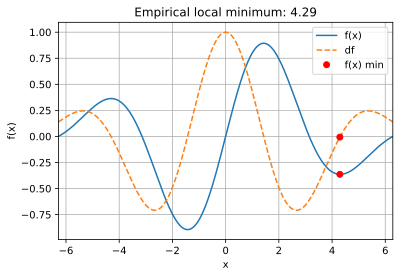

In [19]:
# Random starting point
local_min = np.random.choice(a=x, size=1)
# local_min = np.array([6])

# Learning parameters
learning_rate = 0.01
training_epochs = 1000

# Run through training
trajectory = np.zeros(shape=(training_epochs, 1))
for i in range(training_epochs):
  grad = deriv(local_min)
  local_min -= learning_rate * grad
  trajectory[i, :] = local_min

# Plot the results
plt.plot(x, f_x(x), x, deriv(x), '--')
plt.plot(local_min, f_x(local_min), 'ro')
plt.plot(local_min, deriv(local_min), 'ro')
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title(f'Empirical local minimum: {np.round(local_min[0], 2)}')
plt.show()

# Run parametric experiments

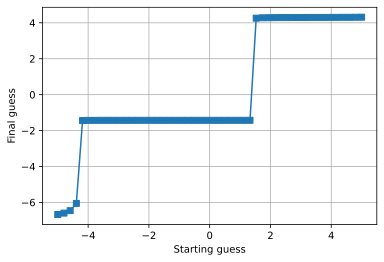

In [23]:
start_location = np.linspace(start=-5, stop=5, num=50)
final_result = np.zeros(shape=(len(start_location)))

# Loop over different   starting points
for index, local_min in enumerate(start_location):
  # Run through training
  for i in range(training_epochs):
    grad = deriv(local_min)
    local_min -= learning_rate * grad
  # Store the final guess
    final_result[index] = local_min

# Plot the results
plt.plot(start_location, final_result, 's-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.grid()
plt.show()

## Experiment 2: systematically varying the learning rate

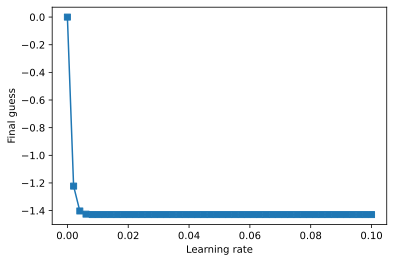

In [25]:
learning_rates = np.linspace(start=1e-10, stop=1e-1, num=50)
final_result = np.zeros(shape=(len(learning_rates)))

# Loop over learning rates
for index, learning_rate in enumerate(learning_rates):
  # Force starting guess to 0
  local_min = 0
  # Run through training
  for i in range(training_epochs):
    grad = deriv(local_min)
    local_min -= learning_rate * grad
  
  # Store the final guess
  final_result[index] = local_min

plt.plot(learning_rates, final_result, 's-')
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show()

## Experiment 3: interaction between learning rate and training epochs

In [29]:
# Setup parameters
learning_rates  = np.linspace(start=1e-10, stop=1e-1, num=50)
training_epochs = np.round(np.linspace(start=10, stop=500, num=40))

# Initialize matrix to store results
final_results   = np.zeros(shape=(len(learning_rates), len(training_epochs)))

# Loop over learning rates
for LR_idx, learning_rate in enumerate(learning_rates):
  # Loop over training epochs
  for TE_idx, training_epoch in enumerate(training_epochs):
    # Run through training (again fixing starting location)
    local_min = 0
    for i in range(int(training_epoch)):
      grad = deriv(local_min)
      local_min -= learning_rate * grad
    # Store the final guess
    final_results[LR_idx, TE_idx] = local_min


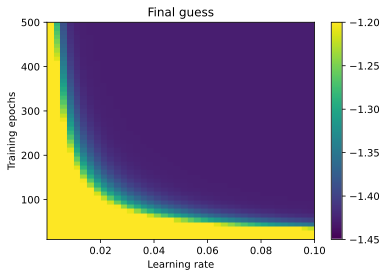

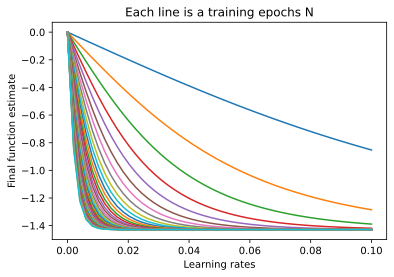

In [38]:
# Plot the results
plt.imshow(final_results, extent=[learning_rates[0], learning_rates[-1], training_epochs[0], training_epochs[-1]],
           aspect='auto', origin='lower', vmin=-1.45, vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

# Another visualization
plt.plot(learning_rates, final_results)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()

# Additional explorations
1) In experiment 3, set the starting location to be 1.6. Re-run the experiment and the image. You'll need to re-adjust 
   the figure color limits; check the line plots at the top of the code to determine a useful color range. Does the new
   starting value change your conclusions about the interaction between learning rate and training epochs?

2) In the same experiment, now change the starting location to be random (use code: np.random.choice(x,1)). How do these
   results look? Are you surprised? Are the results of this experiment still interpretable and what does this tell you 
   about running experiments in DL?